# HHL

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.tools.qi.pauli import Pauli
from qiskit_aqua import Operator, QuantumAlgorithm, AlgorithmError
from qiskit_aqua import get_initial_state_instance, get_iqft_instance

from qiskit.tools.visualization._circuit_visualization import matplotlib_circuit_drawer

import numpy as np


from qpe import QPE
from fix_rotation import add_eigenvalue_inversion, add_measurement_gates

In [2]:
N = 2
N_ev = 2
N_sv = int(np.log2(N))
measure = True
backend = "local_qasm_simulator"
print(N,N_ev,N_sv)

2 2 1


In [18]:
np.random.seed(0)
def generate_matrix():
    """Generate 2x2 matrix with commuting Pauli matrices"""
    
    X = np.array([[0,1],
                 [1,0]])
    Z = np.array([[1,0],
                 [0,-1]])
    I = np.array([[1,0],
                 [0,1]])
    
    pauli = X #if np.random.choice(['X','Z'],1) == 'X' else Z
    
    matrix = np.random.rand() * I + np.random.rand() * pauli
    
    #print(matrix)
    return matrix
    
generate_matrix()

array([[0.5488135 , 0.71518937],
       [0.71518937, 0.5488135 ]])

## State initialization

## QPE



[[ 2 -1]
 [-1  2]]
Eigenvalues: [1. 3.]
QPE circuit qasm length is roughly 32.


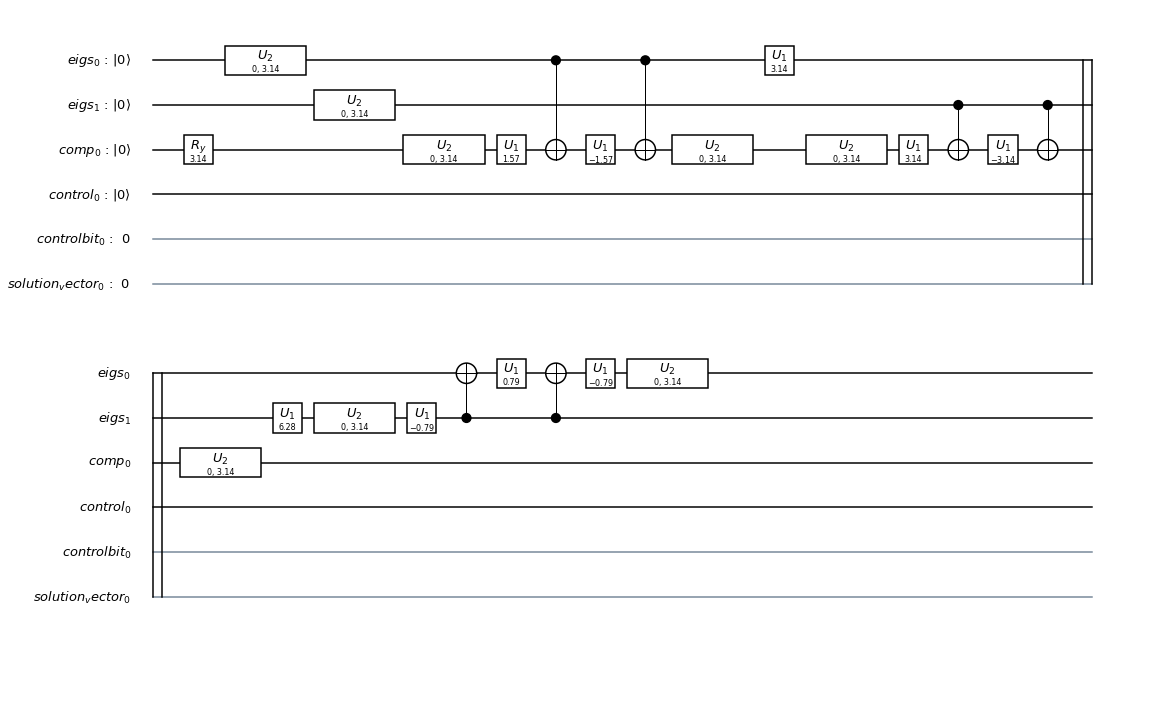

In [35]:
qpe = QPE()
matrix = np.array([[2, -1 ],[-1, 2]])#generate_matrix()

w, v = np.linalg.eigh(matrix) 

print(matrix)
print("Eigenvalues:", w)

invec = sum([v[:,i] for i in range(N)])
invec /= np.sqrt(invec.dot(invec.conj()))
invec =  [0,1]

params = {
    'algorithm': {
            'name': 'QPE',
            'num_ancillae':2,
            'num_time_slices': 1,
            'expansion_mode': 'trotter',
            'expansion_order': 0,
            'hermitian_matrix': True,
            'negative_evals': False,
            'backend' : "local_qasm_simulator",
            #'evo_time': 2*np.pi/4,
            #'use_basis_gates': False,
    },
    "iqft": {
        "name": "STANDARD"
    },
    "initial_state": {
        "name": "CUSTOM",
        "state_vector": invec#[1/2**0.5,1/2**0.5]
    }
}

qpe.init_params(params, matrix)

qc = qpe._setup_qpe(measure=False)
matplotlib_circuit_drawer(qc)


## inversion and rotation

[0, 0] 0
[0, 1] 0.5
[1, 0] 0.25
[1, 1] 0.75
odict_values([[[0, 1], 0.5235987755982989], [[1, 0], 1.5707963267948966], [[1, 1], 0.3398369094541219]])
[0, 1] 0.5235987755982989
[1, 0] 1.5707963267948966
[1, 1] 0.3398369094541219


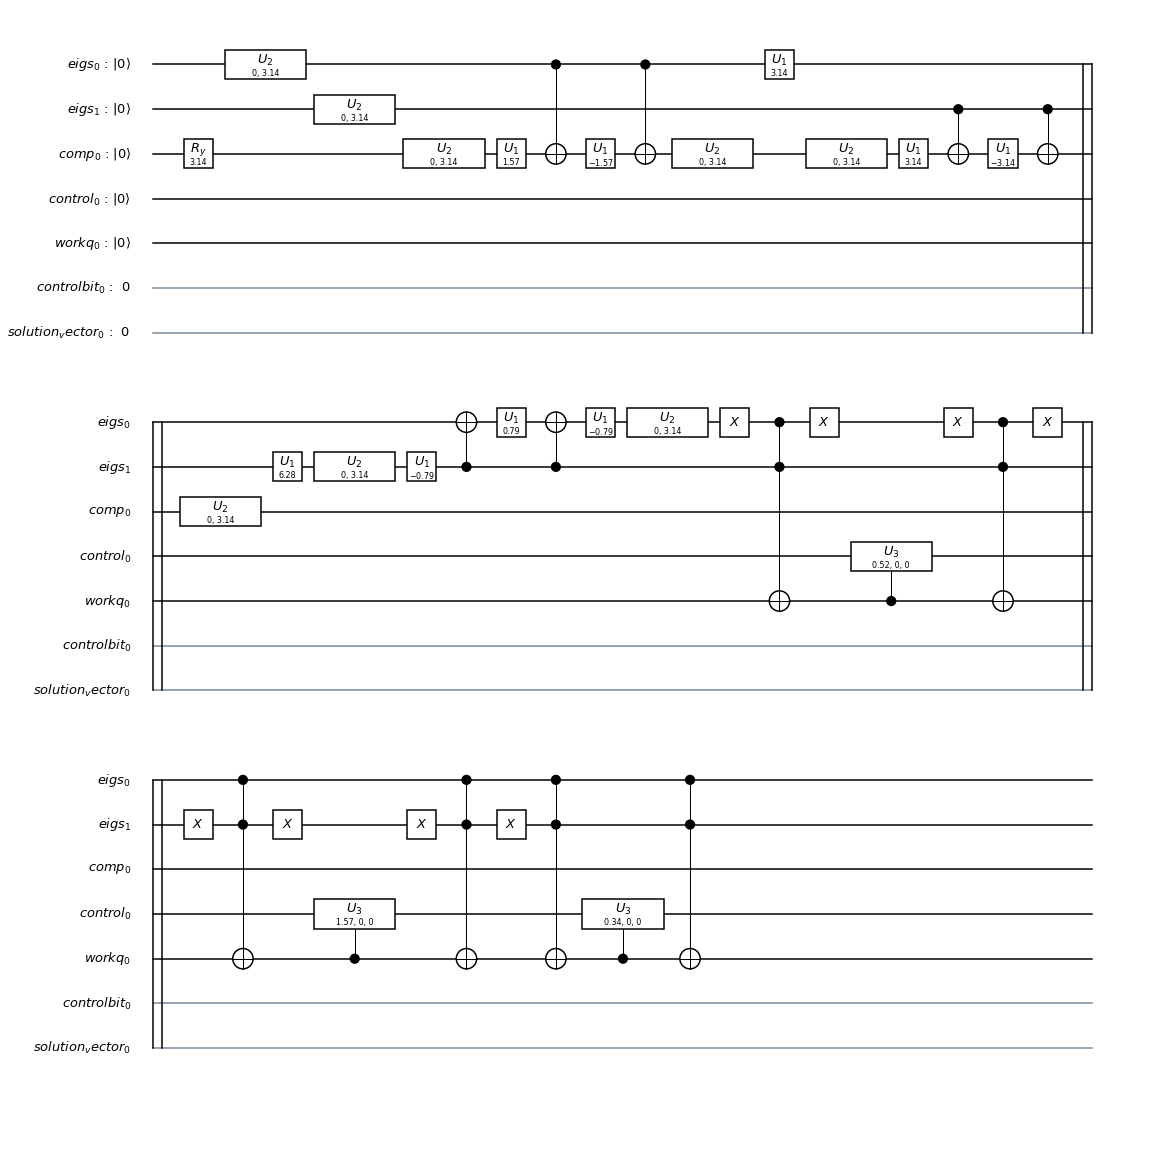

In [36]:

add_eigenvalue_inversion(qc)
matplotlib_circuit_drawer(qc)

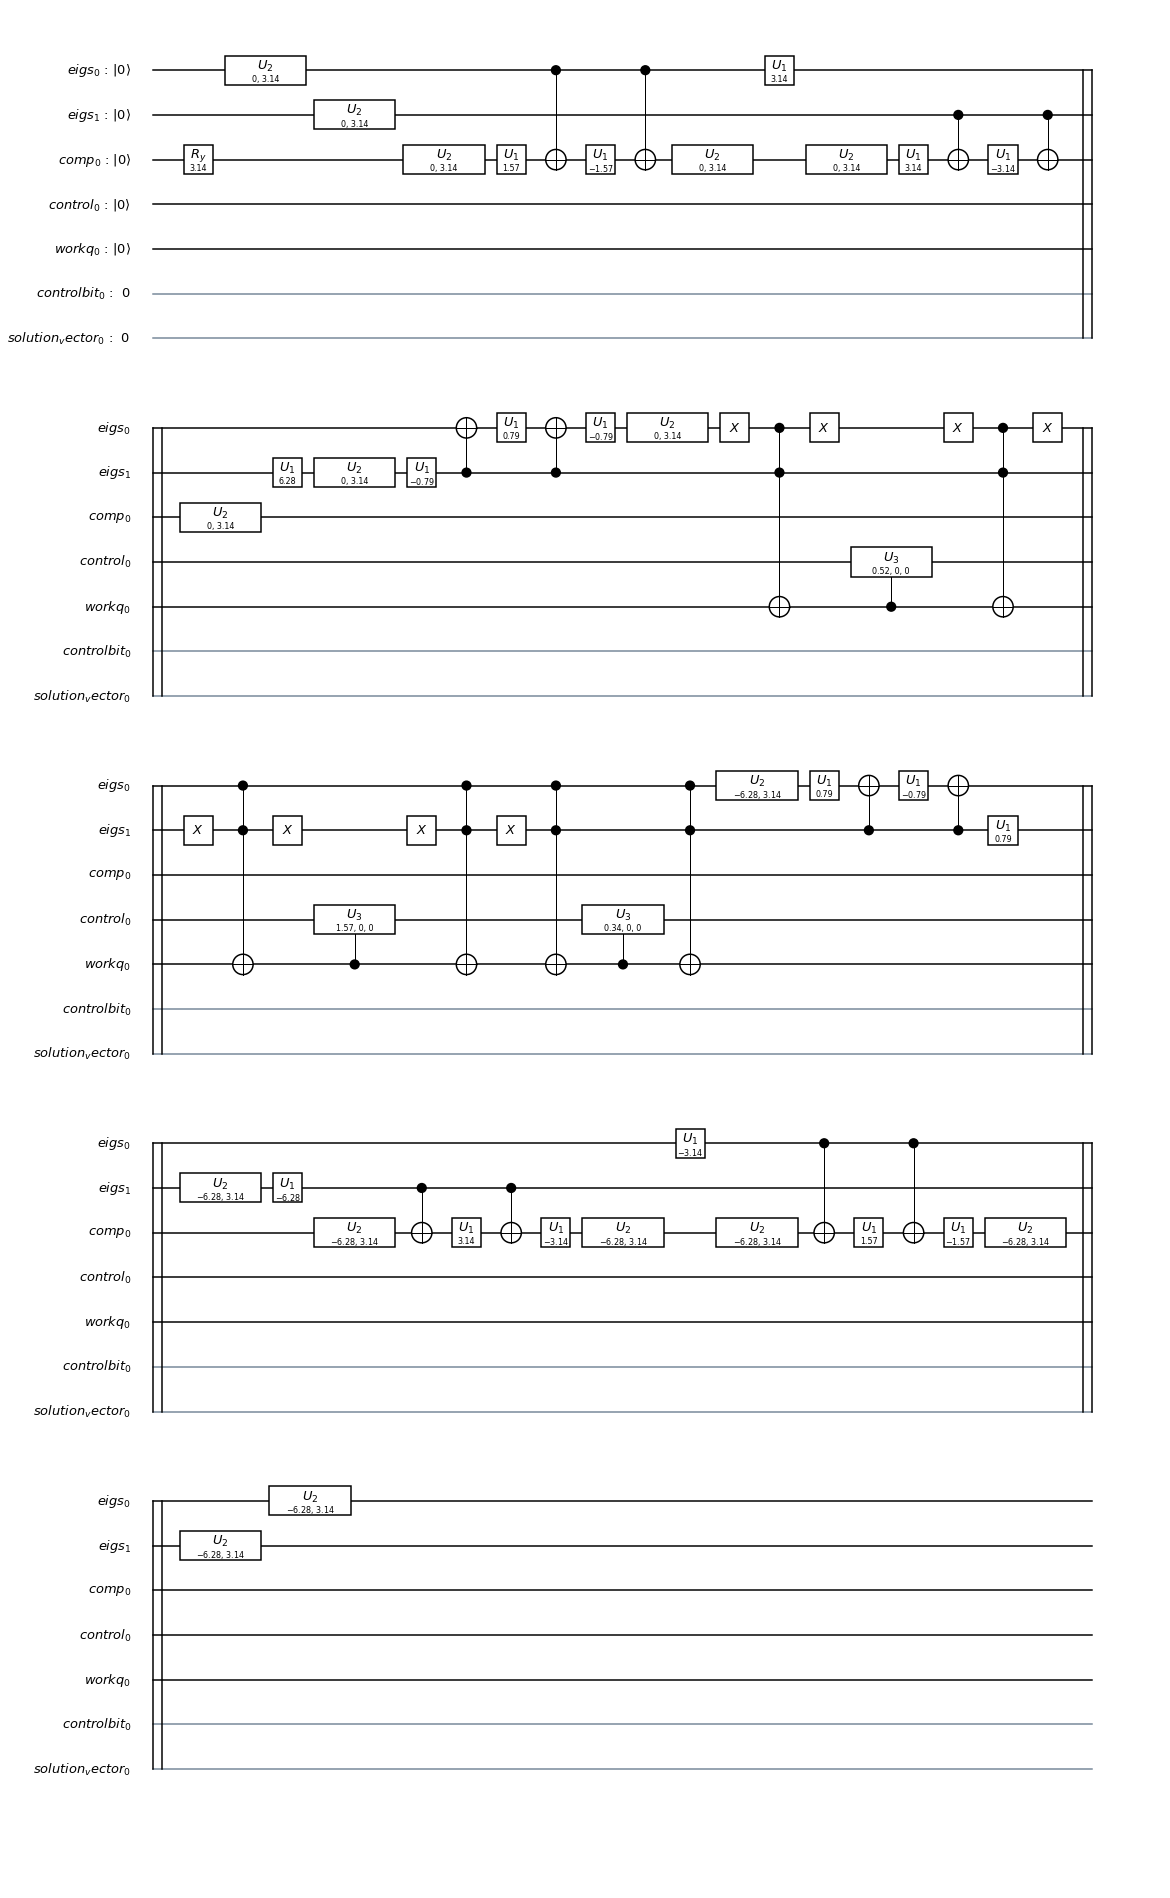

In [37]:
qc += qpe._construct_inverse()
matplotlib_circuit_drawer(qc)

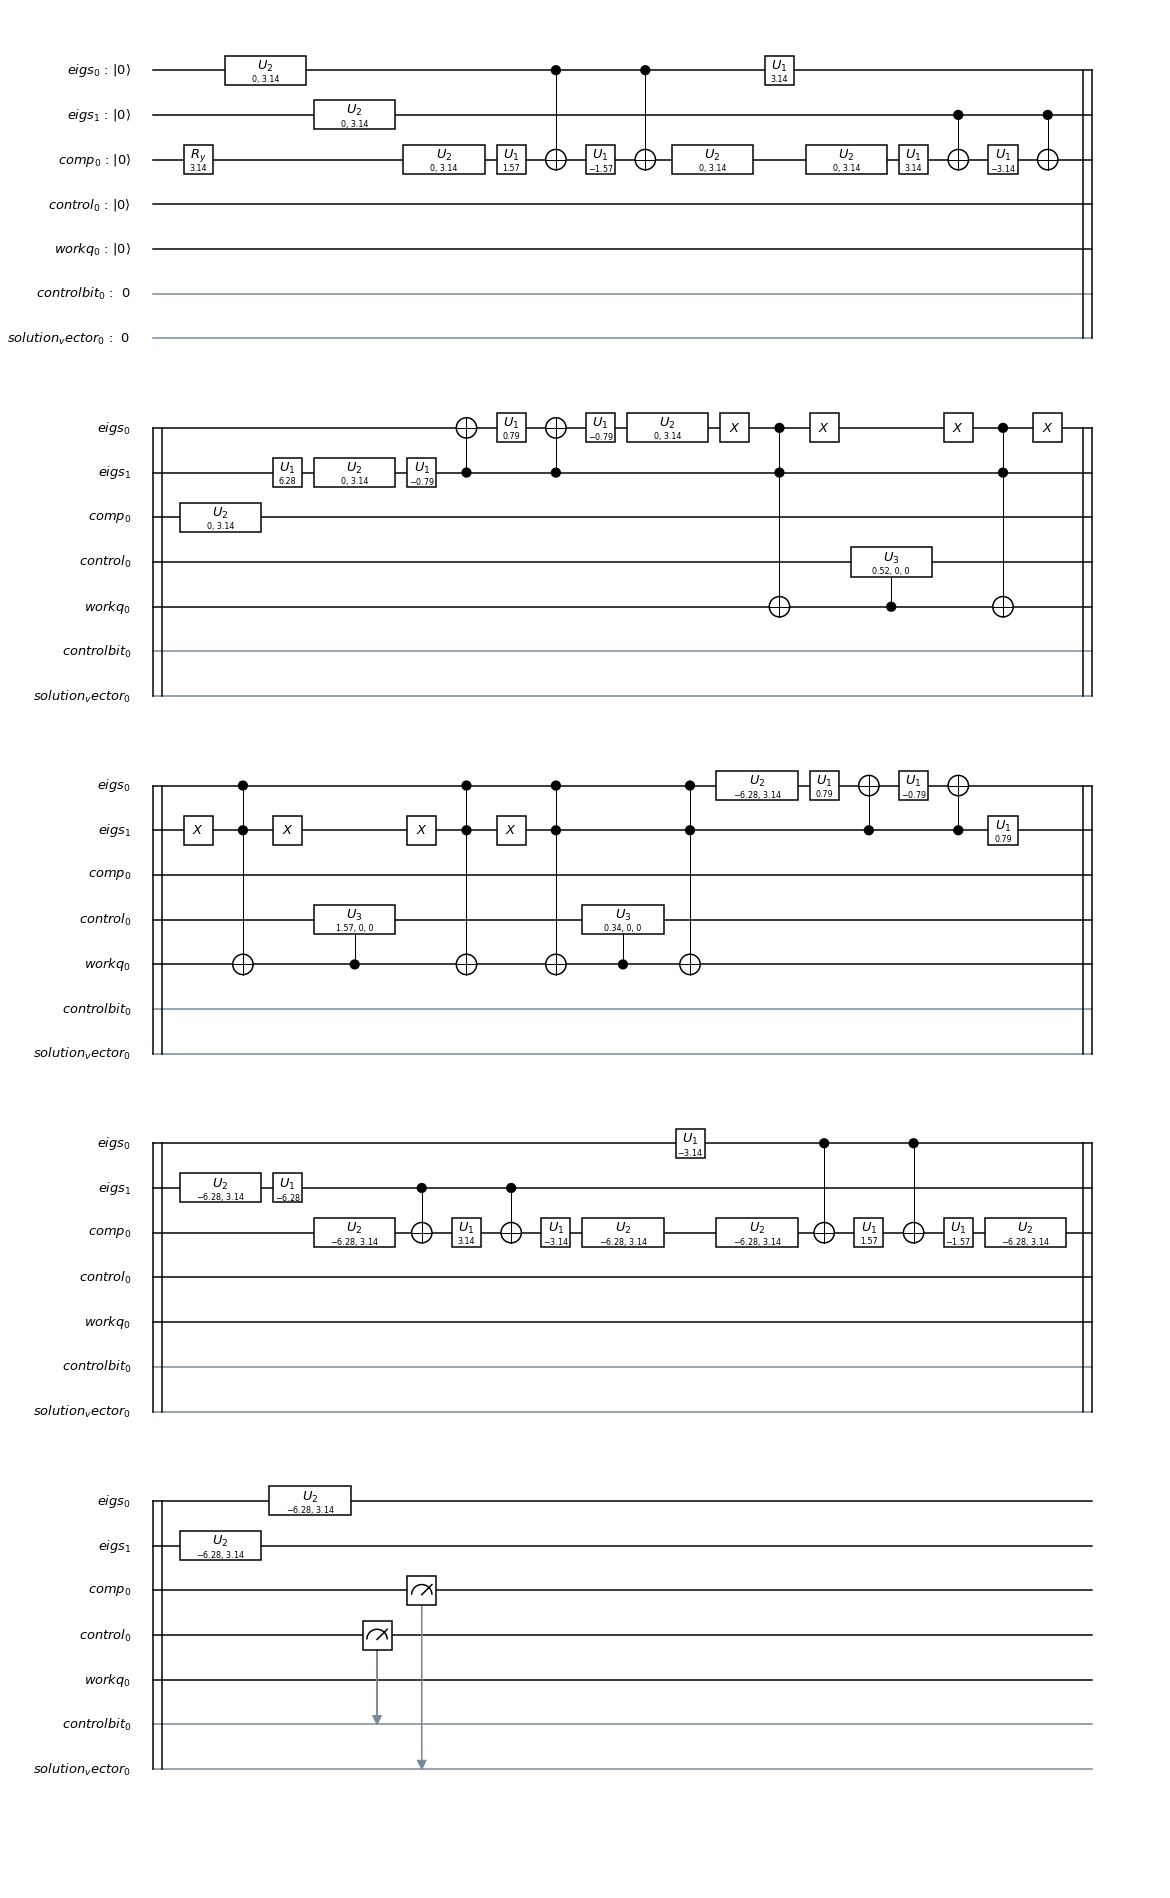

In [38]:
add_measurement_gates(qc)

matplotlib_circuit_drawer(qc)

In [ ]:
result = execute(qc, backend=backend, shots=5000).result()
print(result.get_counts())

In [ ]:
N0 = result.get_counts(qc)['0 1']
N1 = result.get_counts(qc)['1 1']

np.sqrt(N0)/(np.sqrt(N0)+np.sqrt(N1)),np.sqrt(N1)/(np.sqrt(N0)+np.sqrt(N1))

In [25]:
np.matmul(matrix, np.array([np.sqrt(N1)/(np.sqrt(N0)+np.sqrt(N1)),np.sqrt(N0)/(np.sqrt(N0)+np.sqrt(N1))]))

array([0.57248473, 0.57516183])

In [26]:
matrix

array([[0.60276338, 0.54488318],
       [0.54488318, 0.60276338]])

In [27]:
N0 = 0
N1 = 0
for i in range(10):
    qpe = QPE()


    qpe.init_params(params, matrix)

    qc = qpe._setup_qpe(measure=False)
    add_eigenvalue_inversion(qc)
    qc += qpe._construct_inverse()
    add_measurement_gates(qc)
    result = execute(qc, backend=backend, shots=1000).result()

    N0 = N0 + result.get_counts(qc)['0 1']
    N1 = N1 + result.get_counts(qc)['1 1']

QPE circuit qasm length is roughly 32.
[0, 0] 0
[0, 1] 0.5
[1, 0] 0.25
[1, 1] 0.75
odict_values([[[0, 1], 0.5235987755982989], [[1, 0], 1.5707963267948966], [[1, 1], 0.3398369094541219]])
[0, 1] 0.5235987755982989
[1, 0] 1.5707963267948966
[1, 1] 0.3398369094541219
QPE circuit qasm length is roughly 32.
[0, 0] 0
[0, 1] 0.5
[1, 0] 0.25
[1, 1] 0.75
odict_values([[[0, 1], 0.5235987755982989], [[1, 0], 1.5707963267948966], [[1, 1], 0.3398369094541219]])
[0, 1] 0.5235987755982989
[1, 0] 1.5707963267948966
[1, 1] 0.3398369094541219
QPE circuit qasm length is roughly 32.
[0, 0] 0
[0, 1] 0.5
[1, 0] 0.25
[1, 1] 0.75
odict_values([[[0, 1], 0.5235987755982989], [[1, 0], 1.5707963267948966], [[1, 1], 0.3398369094541219]])
[0, 1] 0.5235987755982989
[1, 0] 1.5707963267948966
[1, 1] 0.3398369094541219
QPE circuit qasm length is roughly 32.
[0, 0] 0
[0, 1] 0.5
[1, 0] 0.25
[1, 1] 0.75
odict_values([[[0, 1], 0.5235987755982989], [[1, 0], 1.5707963267948966], [[1, 1], 0.3398369094541219]])
[0, 1] 0.52359

In [28]:
np.sqrt(N0)/(np.sqrt(N0)+np.sqrt(N1)),np.sqrt(N1)/(np.sqrt(N0)+np.sqrt(N1))

(0.48600302571809517, 0.5139969742819048)

In [33]:
np.linalg.solve(matrix,[0.5,0.5])

array([0.4356742, 0.4356742])